In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import preprocess_input


In [2]:
TEST_DIR = "../dataset/test"
IMG_SIZE = 224
BATCH_SIZE = 16


Found 66 images belonging to 3 classes.
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step
                 precision    recall  f1-score   support

          Covid       1.00      0.77      0.87        26
         Normal       0.74      0.85      0.79        20
Viral Pneumonia       0.83      0.95      0.88        20

       accuracy                           0.85        66
      macro avg       0.86      0.86      0.85        66
   weighted avg       0.87      0.85      0.85        66



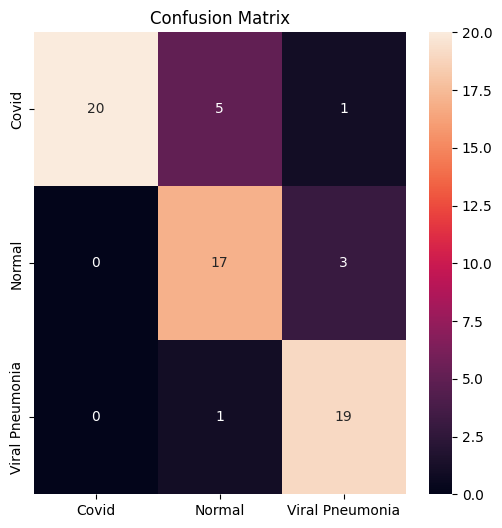

In [3]:
model = load_model("../outputs/models/best_model.h5")

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_gen = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

preds = model.predict(test_gen)
y_pred = np.argmax(preds, axis=1)
y_true = test_gen.classes

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=test_gen.class_indices.keys(),
            yticklabels=test_gen.class_indices.keys())
plt.title("Confusion Matrix")
plt.savefig("../outputs/plots/confusion_matrix.png")

print(classification_report(y_true, y_pred,
      target_names=test_gen.class_indices.keys()))